# KPIs & Score out of Youtube API

# in discussion with Ale and Simon: 
- total , average likes per video
- total , average views

- makes more sense in combination
- we want persisten streamer. thats someone we want to advertise.
- total likes tell us how much exposure

In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt

#### Get the Channel Statistics

In [90]:
def get_channel_stats(user):#see path json needs to be parsed
    with open(f"YTjson/{user}.json") as f:
        data = list(json.load(f).items())
        data = data[0][1]
        return data["channel_statistics"]
    

In [89]:
get_channel_stats("auron")

{'viewCount': '1484519640',
 'subscriberCount': '11300000',
 'hiddenSubscriberCount': False,
 'videoCount': '370'}

#### Transform it to a dict.

In [91]:
def channelstats_toframe(channel_stats):
    column_names = ["viewCount", "subscriberCount", "hiddenSubscriberCount", "videoCount"]
    df = pd.DataFrame(data=channel_stats, columns=column_names, index=range(0))
    return df.append(channel_stats, ignore_index=True)
    

In [92]:
channelstats_toframe(get_channel_stats("auron"))
#todo: Username needs to be added to the df
#todo: df with all streamers we have needs to be done

,viewCount,subscriberCount,hiddenSubscriberCount,videoCount
0,1484519640,11300000,False,370


#### Transform the json in for us useful data, return it as a dataframe

In [94]:
#final function 
def Streamer_kpis(df):
    data = []
    final_data = {}
    values = ["title", "channelId", "channelTitle", "categoryId", "viewCount", "likeCount", "dislikeCount", "commentCount"]
    
    df = pd.DataFrame(columns=["video"] + values)
    with open("YTjson/auron.json") as f:
        data = list(json.load(f).items())
        data = data[0][1]
    for video, data_inVideo in data["video_data"].items():
        final_data["video"] = video
        for features in values:
            final_data[features] = data_inVideo[features]
        df = df.append(final_data, ignore_index=True)
    return df


#### Conversion into the correct file formats. 

In [7]:
#all columns transfered to the right dtypes
def correct_file_formats(df):
    df = df.astype({"categoryId": "int64", "viewCount": "int64", "likeCount": "int64", "dislikeCount": "int64", "commentCount": "int64"})
    #df = pd.to_numeric("categoryId", "float64")
    return df

In [10]:
df = correct_file_formats(df)

#### KPI calculations

In [12]:
def max_like(df):
    maxx = df["likeCount"].max()
    return maxx

In [ ]:

def avg_like(df):
    avg = df["likeCount"].mean()
    return avg

In [ ]:
df.viewCount.isnull().values.any()

#### transform the column "categoryId" into the categories by name; not index

In [50]:


# "categoryId" has matching categorynames for every number. The function returns a piechart.
def category_pie(df):
    
    game_categories = {
    1 : "Film&Animation",
    2 : "Autos&Vehicles",
    10 : "Music",
    15 : "Pets&Animals",
    17 : "Sports",
    19 : "Travel&Events",
    20 : "Gaming",
    22 : "People&Blogs",
    23 : "Comedy",
    24 : "Entertainment",
    25 : "News&Politics",
    26 : "Howto&Style",
    27 : "Education",
    28 : "Science&Technology",
    29 : "Nonprofits&Activism",
}
     
    df["categoryId"] = df["categoryId"].replace(game_categories)
    return df
    
        
    
    #plot this to a pie chart

In [56]:
df = category_pie(df)

#### transforming the categorie in numbers to represent the different parts

In [101]:
def value_counts(df):
    value_count = df["categoryId"].value_counts()
    return value_count

In [ ]:
value_counts(df)

#### ploting a pie chart out of it

In [103]:
def plot_pie(value_count):
    plt.figure(figsize=(10,10))
    plt.pie(value_count, labels=["Gaming", "Comedy", "Entertainment"], frame=True) # !!! HARDCODED THE LABELS NEED TO ADAPT THE LABELS FROM THE STREAMER! 
    plt.show()
    


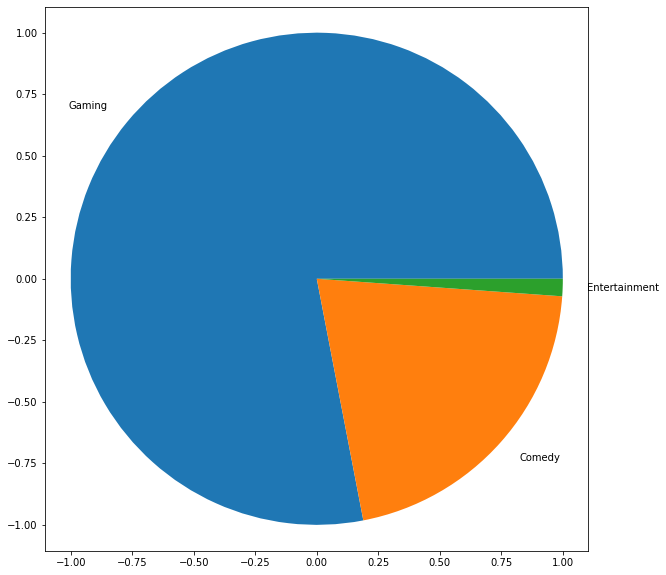

In [104]:
plot_pie()